In [163]:
import numpy as np
import matplotlib.pyplot  as plt
import pandas as pd
from math import *

In [166]:
D=1
def f(w):
    return 418.9829-w*sin(np.sqrt(w))

<ipython-input-166-9ae92e195539>:3: RuntimeWarning: invalid value encountered in sqrt
  return 418.9829-w*sin(np.sqrt(w))


[418.9829, 418.1414290151921, 417.0073681080145, 416.0218200650289, 415.3457102926972, 415.0491543422639, 415.1539541891092, 415.6524971329307, 416.5183260610956, 417.71281992746117, 419.1897353152958, 420.89843761772613, 422.78626595841536, 424.80029277907994, 426.88864258340027, 429.00147947507526, 431.0917399249268, 433.11566604577956, 435.0331805806208, 436.8081350987122, 438.40845597921304, 439.8062077012922, 440.97758916704737, 441.9028758812245, 442.56631854965343, 442.95600686657843, 443.0637058215325, 442.88467068526757, 442.41744587086816, 441.6636520659384, 440.62776536132185, 439.3168915358928, 437.7405381761079, 435.91038689810495, 433.8400675872506, 431.5449362657064, 429.0418579351613, 426.3489955132001, 423.4856057827565, 420.47184310057673, 417.328571459101, 414.07718536375535, 410.7394398718713, 407.33729003823953, 403.8927399238651, 400.42770124731607, 396.9638616908072, 393.52256281471364, 390.12468748355593, 386.7905566627793, 383.5398354080979, 380.39144783711833,

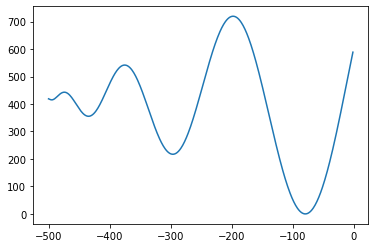

In [167]:
import tensorflow as tf
x = []
y = []
for i in range(-500,500):
    x.append(i)
for i in x:
    y.append(f(x[i]))
print(y)
plt.plot(x,y)
plt.show()

In [95]:
def DerrivF (w):
    Dc= -sin(np.sqrt(w[0]))-1/2*(np.sqrt(w[0]))*cos(np.sqrt(w[0]))
    return Dc

In [96]:
def gd(x, grad, alpha, max_iter=10):
    xs = np.zeros((1 + max_iter, x.shape[0]))
    xs[0, :] = x
    for i in range(max_iter):
        x = x - alpha * grad(x)
        xs[i+1] = x
    return xs

In [97]:
def gd_momentum(x, grad, alpha, beta=0.9, max_iter=10):
    xs = np.zeros(1 + max_iter)
    xs[0] = x
    v = 0
    for i in range(max_iter):
        v = beta*v + (1-beta)*grad(x)
        vc = v/(1+beta**(i+1))
        x = x - alpha * vc
        xs[i+1] = x
    return xs

[[20.        ]
 [19.99699331]
 [19.99398539]
 ...
 [ 5.2391993 ]
 [ 5.2391993 ]
 [ 5.2391993 ]]


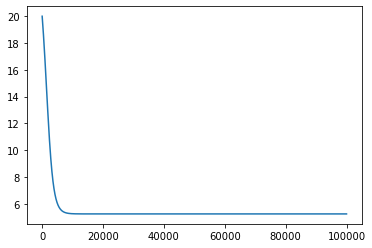

In [130]:
w = np.array([20])

Dc = -sin(np.sqrt(w[0]))-1/2*(np.sqrt(w[0]))*cos(np.sqrt(w[0]))

xs = gd(np.array([20]), DerrivF, alpha= 0.002, max_iter= 100000)

print(xgrad)
plt.plot(xs)

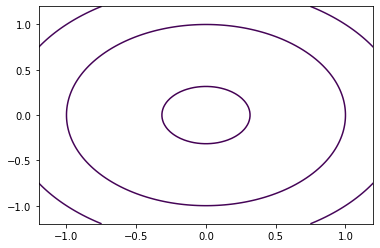

In [99]:
w = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
W, Y = np.meshgrid(x, y)
levels = [0.1,1,2,4,9, 16, 25, 36, 49, 64, 81, 100]
Z = w**2 + Y**2
c = plt.contour(W, Y, Z, levels)
pass

[20.         19.99984175 19.99952613 ...  5.2391993   5.2391993
  5.2391993 ]


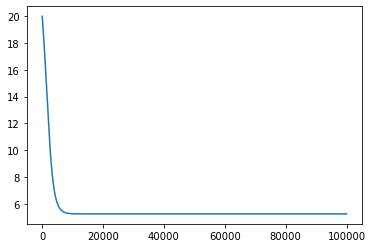

In [124]:
w = np.array([20])

Dc = -sin(np.sqrt(w[0]))-1/2*(np.sqrt(w[0]))*cos(np.sqrt(w[0]))

xs = gd_momentum(w, DerrivF, alpha= 0.002, beta= 0.9, max_iter= 100000)

print(xs)
plt.plot(xs)

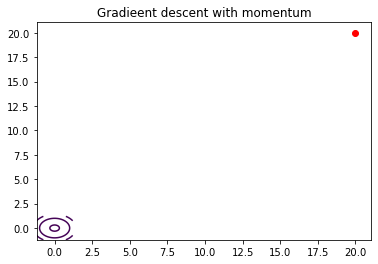

In [102]:
w = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
W, Y = np.meshgrid(w, y)
levels = [0.1,1,2,4,9, 16, 25, 36, 49, 64, 81, 100]
Z = w**2 + Y**2
c = plt.contour(W, Y, Z, levels)
plt.plot(xs[0], xs[1], 'o-', c='red')
plt.title('Gradieent descent with momentum')
pass

In [126]:
def gd2_momentum(x, grad, alpha, beta=0.9, max_iter=10):
    xs = np.zeros((1 + max_iter, x.shape[0]))
    xs[0, :] = x
    v = 0
    for i in range(max_iter):
        v = beta*v + (1-beta)*grad(x)
        vc = v/(1+beta**(i+1))
        x = x - alpha * vc
        xs[i+1, :] = x
    return xs

[[20.        ]
 [19.99984175]
 [19.99952613]
 ...
 [ 5.2391993 ]
 [ 5.2391993 ]
 [ 5.2391993 ]]


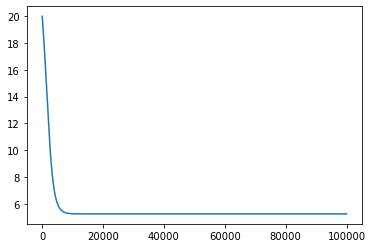

In [127]:
w = np.array([20])

Dc = -sin(np.sqrt(w[0]))-1/2*(np.sqrt(w[0]))*cos(np.sqrt(w[0]))

xs = gd2_momentum(w, DerrivF, alpha= 0.002, beta= 0.9, max_iter= 100000)

print(xs)
plt.plot(xs)

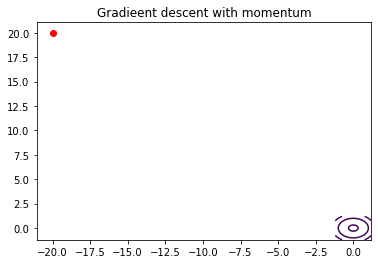

In [92]:
w = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
W, Y = np.meshgrid(w, y)
levels = [0.1,1,2,4,9, 16, 25, 36, 49, 64, 81, 100]
Z = w**2 + Y**2
c = plt.contour(W, Y, Z, levels)
plt.plot(xs[:, 0], xs[:, 1], 'o-', c='red')
plt.title('Gradieent descent with momentum')
pass

In [110]:
def gd2_rmsprop(x, grad, alpha, beta=0.9, eps=1e-8, max_iter=10):
    xs = np.zeros((1 + max_iter, x.shape[0]))
    xs[0, :] = x
    v = 0
    for i in range(max_iter):
        v = beta*v + (1-beta)*grad(x)**2
        x = x - alpha * grad(x) / (eps + np.sqrt(v))
        xs[i+1, :] = x
    return xs

[[20.        ]
 [19.98418861]
 [19.97270626]
 [19.96308608]
 [19.95454241]
 [19.94671019]
 [19.93938588]
 [19.9324428 ]
 [19.92579609]
 [19.91938583]
 [19.91316796]]


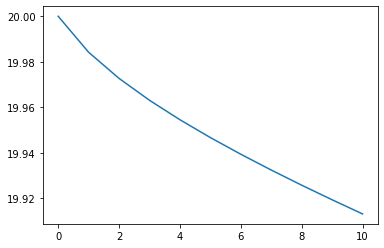

In [128]:
w = np.array([20])

Dc = -sin(np.sqrt(w[0]))-1/2*(np.sqrt(w[0]))*cos(np.sqrt(w[0]))

xs = gd2_rmsprop(w, DerrivF, alpha= 0.005, beta= 0.9, eps=1e-8, max_iter= 10)
#xs = gd2_rmsprop(w, DerrivF, alpha= 0.002, beta= 0.9, max_iter= 100000)

print(xs)
plt.plot(xs)

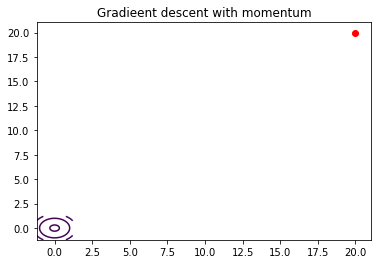

In [119]:
w = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
W, Y = np.meshgrid(w, y)
levels = [0.1,1,2,4,9, 16, 25, 36, 49, 64, 81, 100]
Z = w**2 + Y**2
c = plt.contour(W, Y, Z, levels)
plt.plot(xs[0], xs[1], 'o-', c='red')
plt.title('Gradieent descent with momentum')
pass

In [133]:
def gd2_adam(x, grad, alpha, beta1=0.9, beta2=0.999, eps=1e-8, max_iter=10):
    xs = np.zeros((1 + max_iter, x.shape[0]))
    xs[0, :] = x
    m = 0
    v = 0
    for i in range(max_iter):
        m = beta1*m + (1-beta1)*grad(x)
        v = beta2*v + (1-beta2)*grad(x)**2
        mc = m/(1+beta1**(i+1))
        vc = v/(1+beta2**(i+1))
        x = x - alpha * m / (eps + np.sqrt(vc))
        xs[i+1, :] = x
    return xs

[[20.        ]
 [19.97764492]
 [19.94760847]
 [19.91262286]
 [19.87416405]
 [19.83318798]
 [19.79036845]
 [19.74620375]
 [19.70107361]
 [19.6552732 ]
 [19.60903511]]


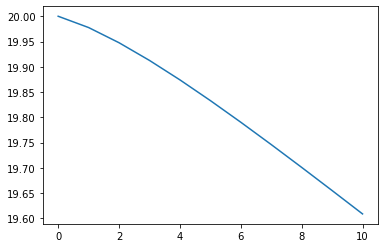

In [134]:
w = np.array([20])
xgrad = gd2_adam(w, DerrivF, alpha= 0.005, beta1=0.9, beta2=0.999, eps=1e-8, max_iter= 10)
print(xgrad)
plt.plot(xgrad)

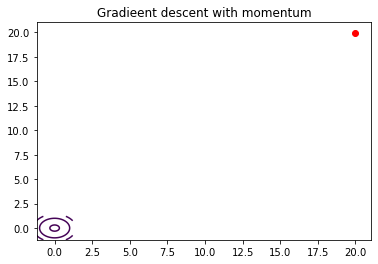

In [137]:
w = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
W, Y = np.meshgrid(w, y)
levels = [0.1,1,2,4,9, 16, 25, 36, 49, 64, 81, 100]
Z = w**2 + Y**2
c = plt.contour(W, Y, Z, levels)
plt.plot(xgrad [0], xgrad[1], 'o-', c='red')
plt.title('Gradieent descent with momentum')
pass